Chapter 4 Exercise 11

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 

%matplotlib inline

/Users/lukwingsan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('data/Auto.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Question 11 (a)


In [4]:
df['mpg01']= np.where(df['mpg'] > df['mpg'].median(), 1, 0)

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [6]:
df = df.drop('mpg', axis=1)
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,8,302.0,140,3449,10.5,70,1,ford torino,0


Question 11 (b)
Answer: From the scatterplots and the last line of the correlation matrix below,  cylinders, displacement and weight are oberserved to be highly correlated with mpg01. They are therefore used for predict mpg01.

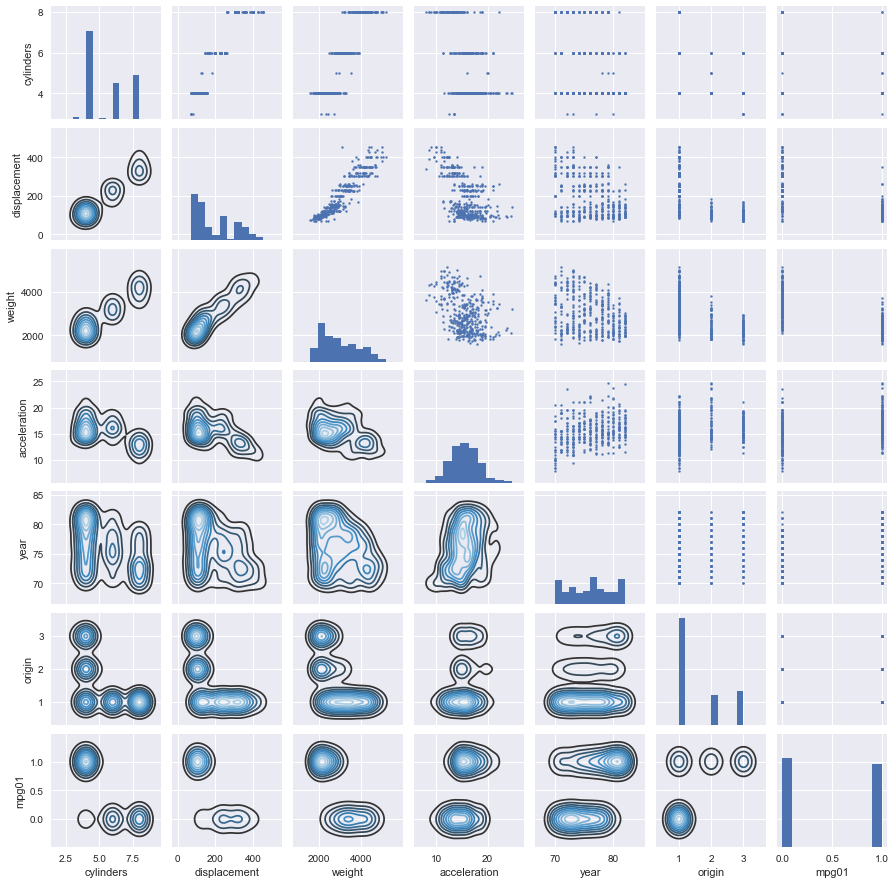

In [22]:
g = sns.PairGrid(df, size=4)
g.map_upper(plt.scatter, s=4)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.fig.set_size_inches(12, 12)

In [8]:
df.corr()

,cylinders,displacement,weight,acceleration,year,origin,mpg01
cylinders,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972,-0.740327
displacement,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664,-0.738607
weight,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265,-0.745734
acceleration,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084,0.322629
year,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314,0.454108
origin,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000,0.511393
mpg01,-0.740327,-0.738607,-0.745734,0.322629,0.454108,0.511393,1.000000


Question 11 (c)

In [9]:
x = df[['cylinders', 'displacement', 'weight']].values
y = df['mpg01'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

Question 11 (d)

In [10]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
accuracy_score(y_test, lda.predict(x_test))

0.89000000000000001

Question 11 (e)

In [11]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)
accuracy_score(y_test, qda.predict(x_test))

0.88

Question 11 (f)

In [12]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
accuracy_score(y_test, lr.predict(x_test))

0.87

Question 11 (g)
Answer: The results below seem to indicated that the best values of K are somewhere around 1 and 22 with lower testing error rates and higher accuracy. 
The lowest testing errror rate occurs for k=3 and k=8 and is ~ 9% error rate

In [19]:
test_error_rate = np.zeros(101)
for K in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(x_train, y_train)
    acc = accuracy_score(y_test, knn.predict(x_test))
       # Use the model on the held out test data
    y_test_predicted = knn.predict(x_test)
    # compute the error rate for this k-value
    test_error_rate[K] = np.mean(y_test_predicted!=y_test)
    print('K = {:3}, accuracy = {:.4f}, error rate = {:.4f}'.format(K, acc, test_error_rate[K]))


K =   1, accuracy = 0.9000, error rate = 0.1000
K =   2, accuracy = 0.8800, error rate = 0.1200
K =   3, accuracy = 0.9100, error rate = 0.0900
K =   4, accuracy = 0.8900, error rate = 0.1100
K =   5, accuracy = 0.8700, error rate = 0.1300
K =   6, accuracy = 0.8900, error rate = 0.1100
K =   7, accuracy = 0.9000, error rate = 0.1000
K =   8, accuracy = 0.9100, error rate = 0.0900
K =   9, accuracy = 0.8900, error rate = 0.1100
K =  10, accuracy = 0.8900, error rate = 0.1100
K =  11, accuracy = 0.8900, error rate = 0.1100
K =  12, accuracy = 0.8800, error rate = 0.1200
K =  13, accuracy = 0.8900, error rate = 0.1100
K =  14, accuracy = 0.8900, error rate = 0.1100
K =  15, accuracy = 0.8900, error rate = 0.1100
K =  16, accuracy = 0.8900, error rate = 0.1100
K =  17, accuracy = 0.8700, error rate = 0.1300
K =  18, accuracy = 0.8900, error rate = 0.1100
K =  19, accuracy = 0.8800, error rate = 0.1200
K =  20, accuracy = 0.8900, error rate = 0.1100
K =  21, accuracy = 0.8900, error rate =